### 문제 정의
자료(2018,2020,2022)

- 총 나라 개수는 195개이나 자료는 153~156
- 코로나 첫케이스가 2019년 12월 31일이므로 코로나 전후, 삶과 공존했을 때 요소도 확인
- 행복지수에 가장 영향을 많이 주는 요소


- 컬럼 정하기:
공통되는 컬럼: rank,country,score,GDP per capita,social support,health life expectancy,freedom to make life choices,generosity,perceptions of corruption
- 컬럼삭제
- 컬럼추가(rank)
- 이름맞추기(데이터 분석시)
- scatter로 산점도 확인/히스토그램으로 자료 확인/각 컬럼별 영향력 시각화(sns.barplot)
- target:score 와 연관관계 (corrwith)



- rank 나라 순위
- country 나라
- happiness score 행복지수
- GDP per capita - GDP
- social support 복지
- healthy life expectancy 건강 수명
- freedom to make life choices 자기 삶 선택 할 수 있는 자유
- generosity 관대함
- perceptions of corruption 소비자 물가 지수

# 데이터 훑어보기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
education = pd.read_csv('./dataset/education.csv')

In [16]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3548 non-null   int64 
 1   State    3548 non-null   object
 2   Type     3548 non-null   object
 3   Length   3548 non-null   object
 4   Expense  3548 non-null   object
 5   Value    3548 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.4+ KB


- 각 데이터 정보 확인 후 수정하여야 될 것
- after_covid rank 삽입
- after_covid,with_covid / before_covid에 맞추어 다른 정보들 삭제
- with_covid 데이터 정보 수정(object -> float) , ,로 되어 있어서 .으로 변경
- with_covid, after_covid 컬럼 배열을 before_covid 순서로 변경
- with_covid null 값 삭제
- 컬럼 명 동일하게 수정이 필요 (before_covid 기준)

In [6]:
# after_covid에 rank 삽입
rank = []
for i in range(len(after_covid['Country name'])):
    rank.append(i+1)

In [7]:
# after_covid에 Rank 열 삽입하여 위에서 만듬 rank 값 삽입
after_covid['Rank'] = rank

In [8]:
# column 순서 변경 (다른 data와 동일하게)
after_covid = after_covid[['Rank','Country name','Ladder score','Explained by: Log GDP per capita', 'Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption']]

In [9]:
# 자료마다 컬럼 수가 달라 동일 컬럼이외에 제거(최대 8개 컬럼만 가능)
after_covid.drop(columns=['Regional indicator','Standard error of ladder score','upperwhisker','lowerwhisker','Logged GDP per capita','Social support'],inplace=True)
after_covid.drop(columns =['Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Ladder score in Dystopia','Dystopia + residual'], inplace=True)

KeyError: "['Regional indicator', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support'] not found in axis"

In [ ]:
with_covid.drop(columns=['Whisker-high','Whisker-low','Dystopia (1.83) + residual'],inplace=True)

In [ ]:
with_covid.isnull().sum()

In [ ]:
with_covid.dropna(axis=0, inplace=True)

In [ ]:
for i,j in enumerate(with_covid.columns):
    if i >= 2:
        with_covid[j]=with_covid[j].str.replace(',','.')

In [10]:
for i,j in enumerate(with_covid.columns):
    if i >= 2:
        with_covid[j] = with_covid[j].astype(float)

ValueError: could not convert string to float: '7,821'

In [11]:
before_covid.columns = ['rank', 'country','happiness score', 'GDP per capita', 'social support', 'healthy life expectancy', 'freedom to make life choices', 'generosity','perceptions of corruption' ]

In [12]:
with_covid.columns = ['rank', 'country','happiness score', 'GDP per capita', 'social support', 'healthy life expectancy', 'freedom to make life choices', 'generosity','perceptions of corruption' ]

ValueError: Length mismatch: Expected axis has 12 elements, new values have 9 elements

In [13]:
after_covid.columns = ['rank', 'country','happiness score', 'GDP per capita', 'social support', 'healthy life expectancy', 'freedom to make life choices', 'generosity','perceptions of corruption' ]

In [14]:
before_covid

,rank,country,happiness score,GDP per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [148]:
with_covid

,rank,country,happiness score,GDP per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
0,1,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...
141,142,Botswana*,3.471,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda*,3.268,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,1.392,0.498,0.631,0.103,0.082,0.034


In [149]:
after_covid

,rank,country,happiness score,GDP per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
0,1,Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,2,Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,3,Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,4,Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,5,Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
...,...,...,...,...,...,...,...,...,...
148,149,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265
149,150,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542
150,151,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929
151,152,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157


- 히스토그램

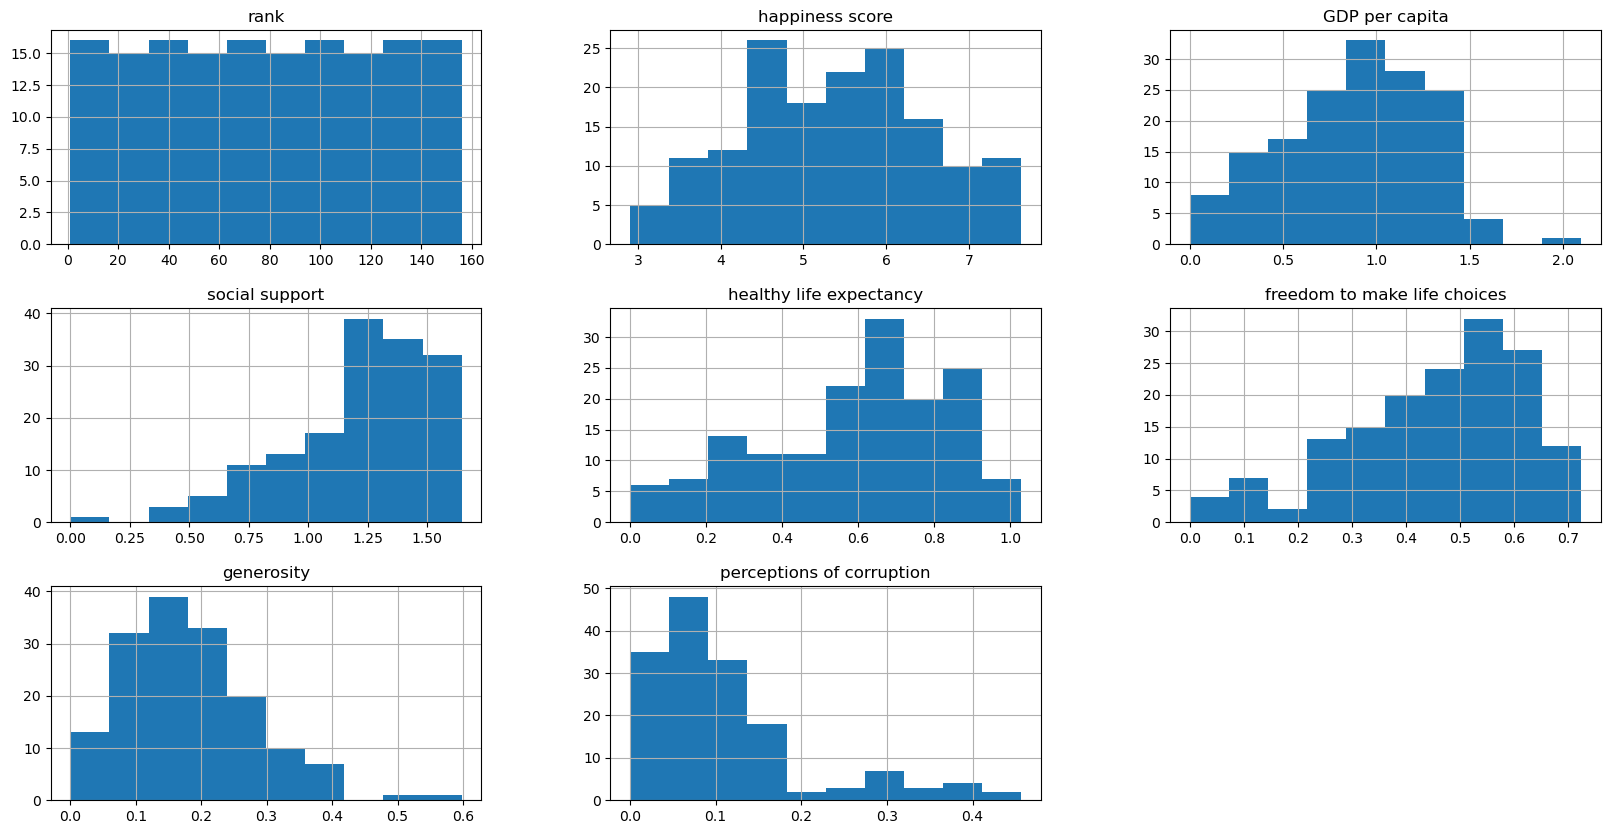

In [150]:
before_covid.hist(bins=10, figsize=(20, 10))
plt.show()

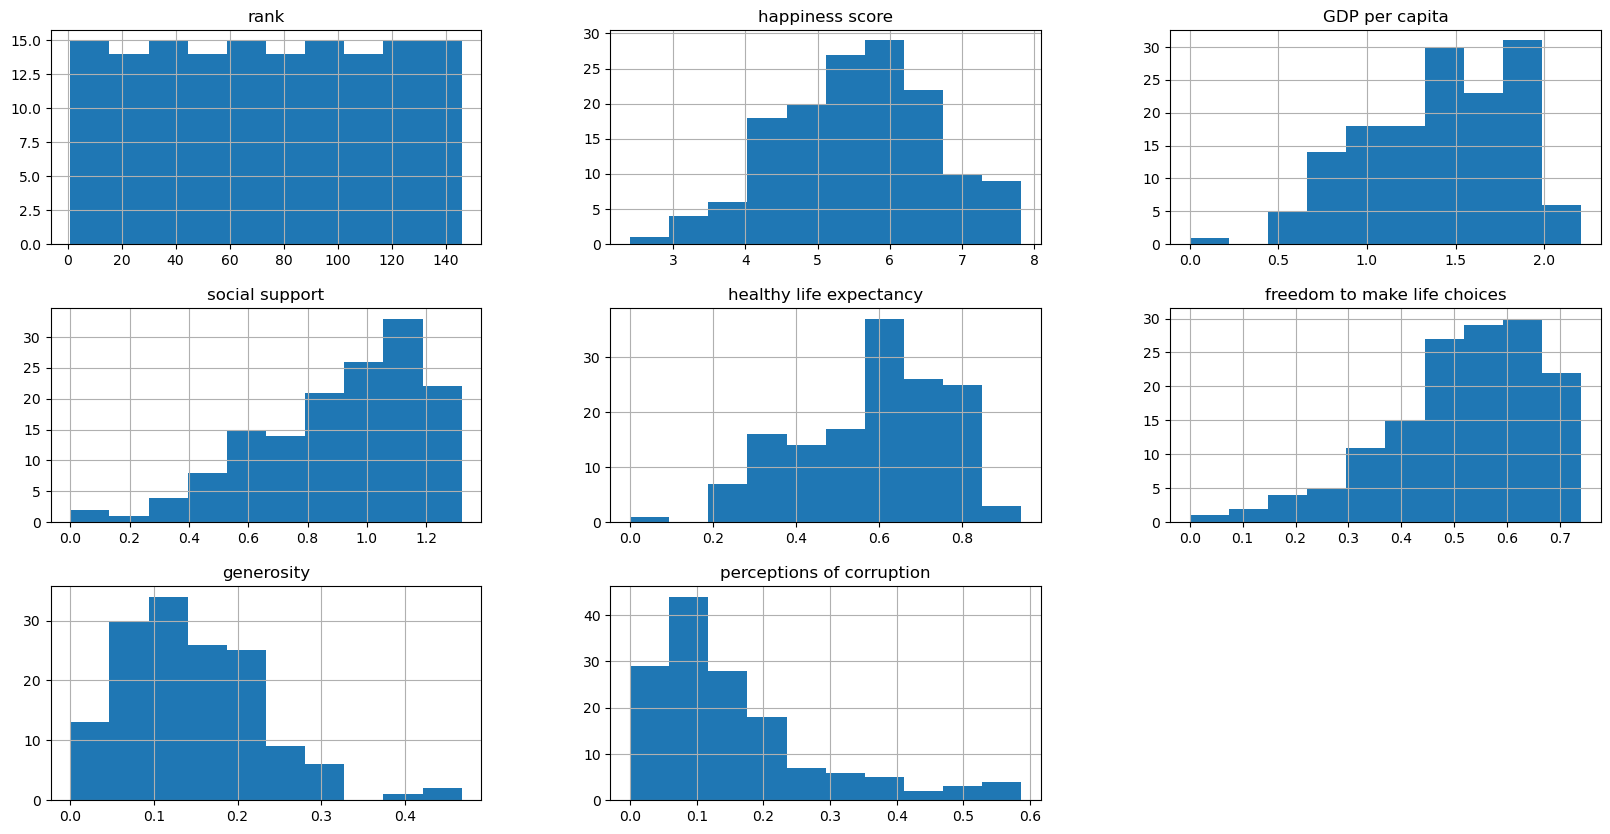

In [151]:
with_covid.hist(bins=10, figsize=(20, 10))
plt.show()

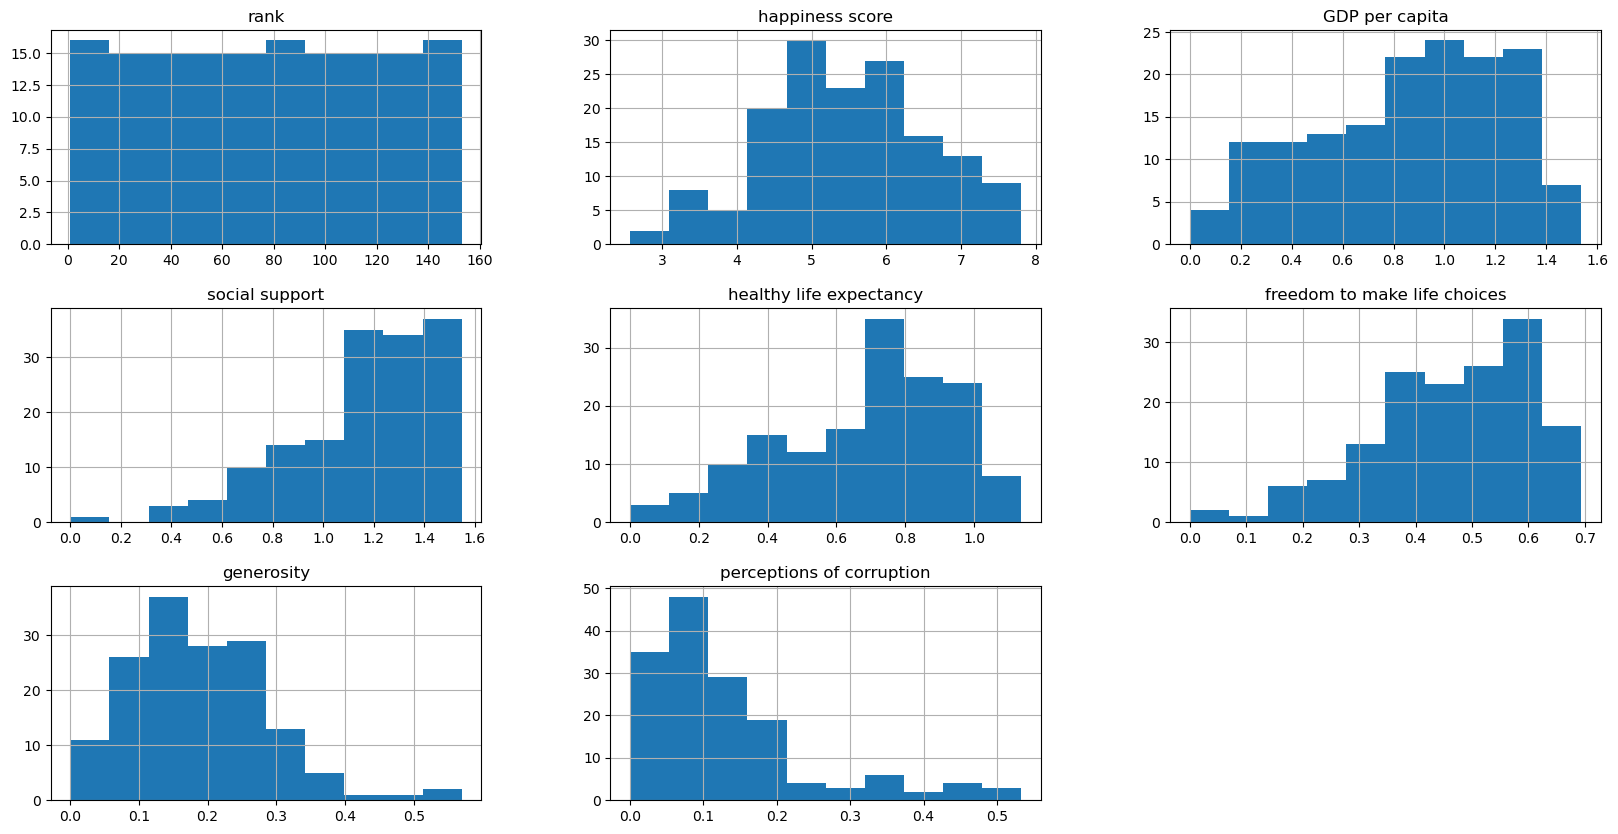

In [152]:
after_covid.hist(bins=10, figsize=(20,10))
plt.show()

- corrwith(상관계수)

<AxesSubplot:>

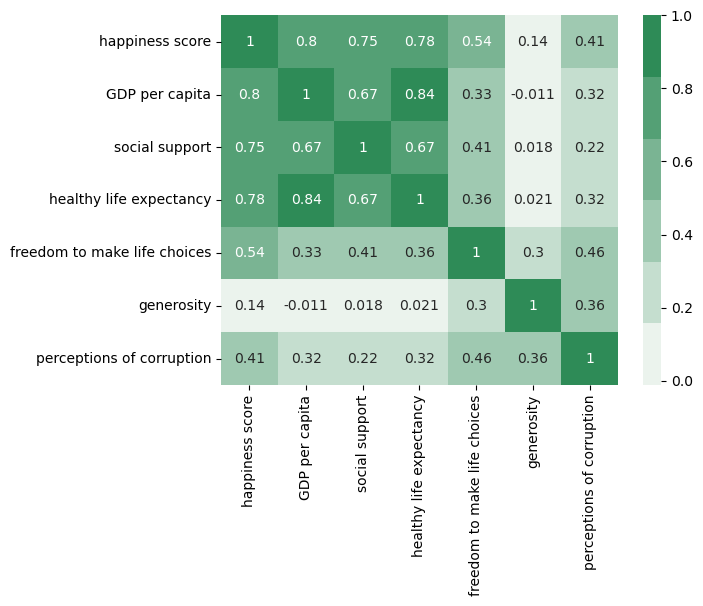

In [177]:
a = before_covid.iloc[:,1:].corr()
colormap = sns.light_palette("seagreen")
sns.heatmap(a, annot=True, cmap=colormap)

<AxesSubplot:>

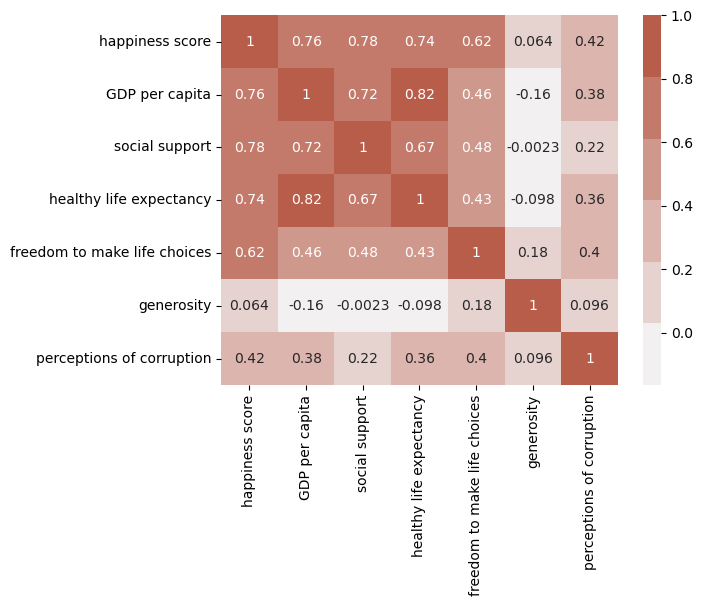

In [189]:
b = with_covid.iloc[:,1:].corr()
colormap = sns.light_palette((20, 60, 50), input="husl")
sns.heatmap(b, annot=True, cmap = colormap)

<AxesSubplot:>

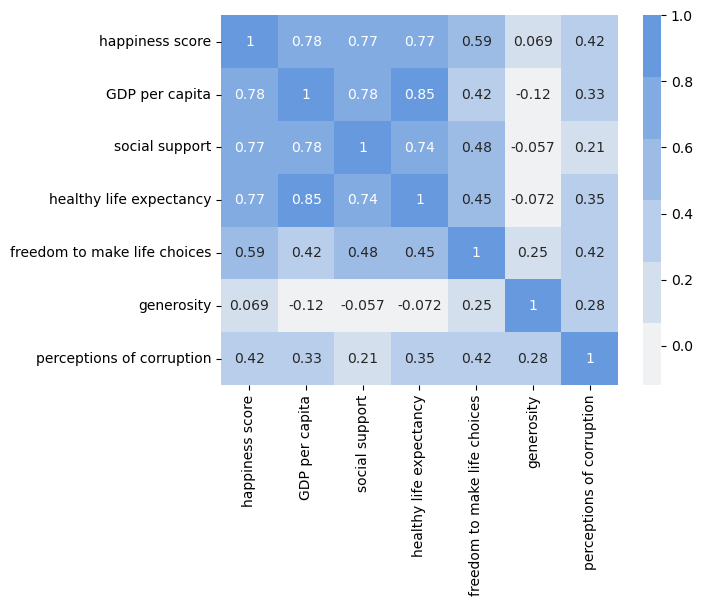

In [188]:
c = after_covid.iloc[:, 1:].corr()
colormap = sns.light_palette("#69d")
sns.heatmap(c, annot=True, cmap=colormap)

<AxesSubplot:xlabel='happiness score', ylabel='GDP per capita'>

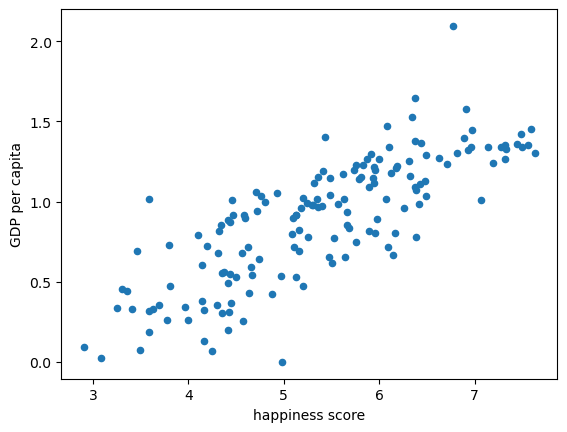

In [190]:
before_covid.plot(kind='scatter', x='happiness score', y='GDP per capita')

- barplot

# sklearn 함수 호출

In [192]:
from sklearn.model_selection import train_test_split


In [ ]:
X = 